## 🔁 Number of Walks of a Given Length in a Graph

### 🔹 Walk Length
In a graph, the **length of a walk** is defined as the **number of edges traversed**, not the number of nodes visited.

A single edge can be repeated multiple times in different walks, and each repetition is counted separately.



### 🔸 Informal Term: Hop

In informal graph theory terms, the **walk length** is also referred to as the number of **"hops"** from one node to its neighboring nodes.



### 🧮 Calculating Number of Walks of Length $l$

To count the number of walks of length $l$ between two nodes in a **simple undirected graph**, we can use the **adjacency matrix** $A$.

Let $A^l$ be the $l^{\text{th}}$ power of the adjacency matrix. Then:

- The entry $(i, j)$ in $A^l$, i.e., $(A^l)_{ij}$,  
  gives the **number of walks of length $l$** from node $j$ to node $i$.



### 🔸 Special Case: Length 1

- If there's a direct edge between node $i$ and node $j$,  
  then $A_{ij} = 1$ → one walk of length 1 exists.
- Otherwise, $A_{ij} = 0$



## 🔢 Number of Walks of a Specific Length (Using Adjacency Matrix Powers)

To compute the **number of walks of a specific length** between two nodes in a graph, we use powers of the **adjacency matrix** $A$.

🧭 **Convention used here**:  
$A_{ij} = 1$ if there is a **directed edge from node $j$ to node $i$**  
(i.e., columns are **sources**, rows are **targets**)

---

### ▶️ Walks of Length 2

The total number of walks of **length 2** from node $i$ to node $j$ is:

$$
N_{ij}^{(2)} = \sum_{k=1}^{n} A_{ik} A_{kj} = [A^2]_{ij}
$$

This means:  
There is a walk of length 2 **from node $j$ to node $i$** via some intermediate node $k$.

> Note: In this notation, we move **right to left**, as edges are from **column to row**.

---

### ▶️ Walks of Length 3

Similarly, for **length 3**:

$$
N_{ij}^{(3)} = \sum_{k=1}^{n} \sum_{\ell=1}^{n} A_{ik} A_{k\ell} A_{\ell j} = [A^3]_{ij}
$$

So, the number of walks of length 3 **from node $j$ to node $i$** is the $(i,j)$-th entry of $A^3$.

---

### 🔁 Generalization: Walks of Length $r$

By extension, the number of walks of **length $r$** from node $j$ to node $i$ is:

$$
N_{ij}^{(r)} = [A^r]_{ij}
$$



In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv, eig

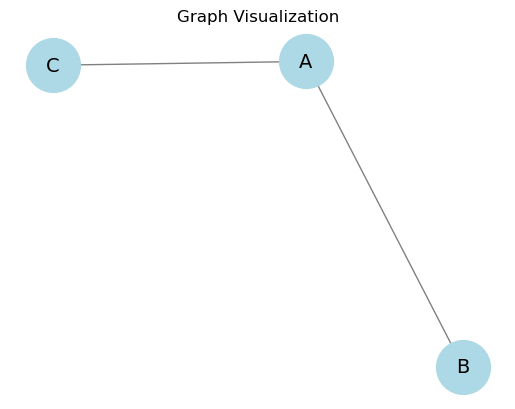

In [8]:
G1 = nx.Graph()
G1.add_edges_from(
    [
        ('A', 'B'),
        ('A', 'C'),
    ]
)


pos = nx.spring_layout(G1, seed=0)
nx.draw_networkx(G1, pos=pos, with_labels=True, node_color='lightblue', node_size=1500, font_size=14, edge_color='gray')

plt.axis('off')
plt.title("Graph Visualization")
plt.show()

In [14]:
adj_matrix = nx.adjacency_matrix(G1, nodelist=sorted(G1.nodes())).todense()

print("Nodes:", sorted(G1.nodes()))
print("Adjacency Matrix:\n", adj_matrix)

Nodes: ['A', 'B', 'C']
Adjacency Matrix:
 [[0 1 1]
 [1 0 0]
 [1 0 0]]


In [18]:
A2 = adj_matrix @ adj_matrix

print(f"Second Power of Adjacency Matrix is: \n {A2}")

Second Power of Adjacency Matrix is: 
 [[2 0 0]
 [0 1 1]
 [0 1 1]]


## 🔍 Analysis of $A^2$ (Second Power of the Adjacency Matrix)

Given:

- Node order: A (index 0), B (index 1), C (index 2)

$$
A^2 =
\begin{bmatrix}
2 & 0 & 0 \\
0 & 1 & 1 \\
0 & 1 & 1
\end{bmatrix}
$$

Each entry $[A^2]_{ij}$ represents the **number of walks of length 2 from node $j$ to node $i$**.

---

### 🧠 Interpretation by Node Names:

#### Row A ($i = A$):

- $[A^2]_{AA} = 2$ → **2 walks of length 2 from A to A**
- $[A^2]_{AB} = 0$ → **No walks of length 2 from B to A**
- $[A^2]_{AC} = 0$ → **No walks of length 2 from C to A**

#### Row B ($i = B$):

- $[A^2]_{BA} = 0$ → **No walks of length 2 from A to B**
- $[A^2]_{BB} = 1$ → **1 walk of length 2 from B to B**
- $[A^2]_{BC} = 1$ → **1 walk of length 2 from C to B**

#### Row C ($i = C$):

- $[A^2]_{CA} = 0$ → **No walks of length 2 from A to C**
- $[A^2]_{CB} = 1$ → **1 walk of length 2 from B to C**
- $[A^2]_{CC} = 1$ → **1 walk of length 2 from C to C**



## 🔁 Walks of Specific Lengths Using Adjacency Matrix Multiplication

We are given an undirected graph with 8 nodes (1 to 8). 


### Adjacency Matrix A:
The adjacency matrix A of the graph is a 8×8 symmetric matrix.  
Element A[m][n] = 1 if there is an edge between node m and node n.



### Squared Adjacency Matrix $A^2$:
$A^2$ gives the number of walks of **length 2** between each pair of nodes.  
Element $A^2[i][j]$ = number of 2-hop walks from node j to node i.

---

### One-Hot Vector:
A one-hot vector $x$ represents that the walker starts at **node 6**:

$$
x = [0\ 0\ 0\ 0\ 0\ 1\ 0\ 0]^T
$$

---

### First Step - $Ax$:
Multiplying $A \cdot x$ results in a vector indicating **all nodes reachable in one hop** from node 6.

---

### Second Step - $A^2x$:
Multiplying $A^2 \cdot x$ gives the number of **2-step walks from node 6** to all other nodes.  
You can reach nodes 2, 3, 4, 5 and 8 **in two steps**.




In [33]:
G = nx.Graph()
edges = [
    (1, 2), (1,4), (2,4), (2,3), (2, 5), (3,5), 
    (4,5), (5,6), (5, 8), (6,7), (6,8), 
]
G.add_edges_from(edges)


In [35]:
A = nx.adjacency_matrix(G, nodelist=sorted(G.nodes()), dtype=int).todense()
print("Adjacency Matrix A:\n", A, '\n')

A2 = A @ A
print("Second Power of Adjacency Matrix A: \n", A2)

x = np.zeros((8, 1), dtype=int)
x[5] = 1
print("\nOne-hot vector x :\n", x.T)

Ax = A @ x
print("\nA @ x (1-hop neighbors of node 6):\n", Ax.T)

A2 = A @ A
A2x = A2 @ x
print("\nA^2 @ x (2-hop walks from node 6):\n", A2x.T)

Adjacency Matrix A:
 [[0 1 0 1 0 0 0 0]
 [1 0 1 1 1 0 0 0]
 [0 1 0 0 1 0 0 0]
 [1 1 0 0 1 0 0 0]
 [0 1 1 1 0 1 0 1]
 [0 0 0 0 1 0 1 1]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 1 1 0 0]] 

Second Power of Adjacency Matrix A: 
 [[2 1 1 1 2 0 0 0]
 [1 4 1 2 2 1 0 1]
 [1 1 2 2 1 1 0 1]
 [1 2 2 3 1 1 0 1]
 [2 2 1 1 5 1 1 1]
 [0 1 1 1 1 3 0 1]
 [0 0 0 0 1 0 1 1]
 [0 1 1 1 1 1 1 2]]

One-hot vector x :
 [[0 0 0 0 0 1 0 0]]

A @ x (1-hop neighbors of node 6):
 [[0 0 0 0 1 0 1 1]]

A^2 @ x (2-hop walks from node 6):
 [[0 1 1 1 1 3 0 1]]


## 🔢 Eigenvalue Decomposition of the Adjacency Matrix

In graph theory, the **adjacency matrix** $A$ of a graph can be analyzed using **eigenvalue decomposition**.

Let $u$ be an eigenvector and $\lambda$ be the corresponding **eigenvalue** of matrix $A$, then:

$$
A u = \lambda u
$$

---

### 📌 Characteristic Equation

To find the eigenvalues $\lambda$, we solve the **characteristic equation**:

$$
\det(A - \lambda I) = 0
$$

- This determinant results in a **polynomial equation** in $\lambda$ of degree $N$ (where $N$ is the number of nodes in the graph).

---

### 🧠 Real Eigenvalues for Symmetric Matrices

Since the adjacency matrix of an **undirected graph** is **symmetric**,  
its eigenvalues are **guaranteed to be real numbers**.

---

### 📐 Characteristic Polynomial Form

The polynomial can be written as:

$$
P(\lambda) = \det(A - \lambda I) = \lambda^N + c_1 \lambda^{N-1} + \cdots + c_N
$$

The **roots** of this polynomial (solutions to $P(\lambda) = 0$) are the **eigenvalues** of the adjacency matrix.

---

### 🔁 Multiplicity of Roots

- Eigenvalues may **repeat** — this is called their **algebraic multiplicity**.
- Each distinct root $\lambda_i$ of $P(\lambda) = 0$ corresponds to at least one **eigenvector**.



We can write the **eigendecomposition** of the adjacency matrix $A$ as:

### 🔁 Matrix Equation:

$$
A U = U \Lambda \\
\Rightarrow A = U \Lambda U^{-1}
$$

---

### 🧮 Where:

- $U$ is a matrix whose **columns are the eigenvectors** $v_1, v_2, \dots, v_N$ of $A$
- $\Lambda$ is a **diagonal matrix** whose diagonal entries are the **eigenvalues** $\lambda_1, \lambda_2, \dots, \lambda_N$

That is:

$$
U =
\begin{bmatrix}
| & | & & | \\
v_1 & v_2 & \cdots & v_N \\
| & | & & |
\end{bmatrix},
\quad
\Lambda =
\begin{bmatrix}
\lambda_1 & 0 & \cdots & 0 \\
0 & \lambda_2 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & \lambda_N
\end{bmatrix}
$$

---

### 📏 Normalization of Eigenvectors

Each eigenvector $u_k$ is typically assumed to be **unit-normalized**:

$$
\|u_k\|^2 = 1 \quad \text{for } k = 0, 1, \dots, N-1
$$

---

### 🔁 Orthogonality (for symmetric matrices)

For **symmetric matrices** (such as the adjacency matrix of an undirected graph), the matrix of eigenvectors $U$ is **orthogonal**:

$$
U^{-1} = U^T \quad \text{and} \quad U^T U = U^{-1} U = I
$$



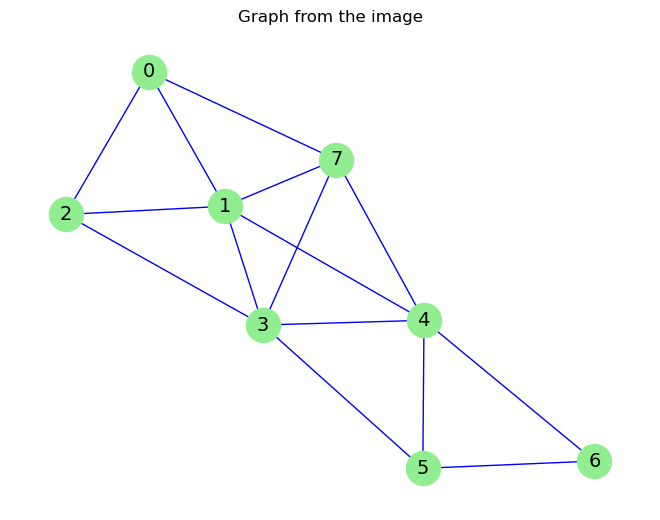

In [2]:
# Create an undirected graph
G3 = nx.Graph()

# Add edges based on the image
edges = [
    (0, 1), (0, 2), (0, 7),
    (1, 2), (1, 3), (1, 4), (1, 7),
    (2, 3),
    (3, 4), (3, 5), (3, 7),
    (4, 5), (4, 6), (4, 7),
    (5, 6),
]

G3.add_edges_from(edges)

# Draw the graph
pos = nx.spring_layout(G3, seed=0) 
nx.draw(G3, pos, with_labels=True, node_color='lightgreen', node_size=600, font_size=14, edge_color='blue')

plt.title("Graph from the image")
plt.show()

In [3]:
adj_matrix3 = nx.adjacency_matrix(G3, nodelist=sorted(G3.nodes)).todense()

print(adj_matrix3)

[[0 1 1 0 0 0 0 1]
 [1 0 1 1 1 0 0 1]
 [1 1 0 1 0 0 0 0]
 [0 1 1 0 1 1 0 1]
 [0 1 0 1 0 1 1 1]
 [0 0 0 1 1 0 1 0]
 [0 0 0 0 1 1 0 0]
 [1 1 0 1 1 0 0 0]]


In [28]:
eigenvalues, eigenvectors = eig(adj_matrix3)

Lambda = np.diag(eigenvalues)

U = eigenvectors
U_inv = inv(U)

A_reconstructed = U @ Lambda @ U_inv

error = np.linalg.norm(adj_matrix3 - A_reconstructed)
print("Reconstruction Error:", error)

Reconstruction Error: 8.394425953408054e-15


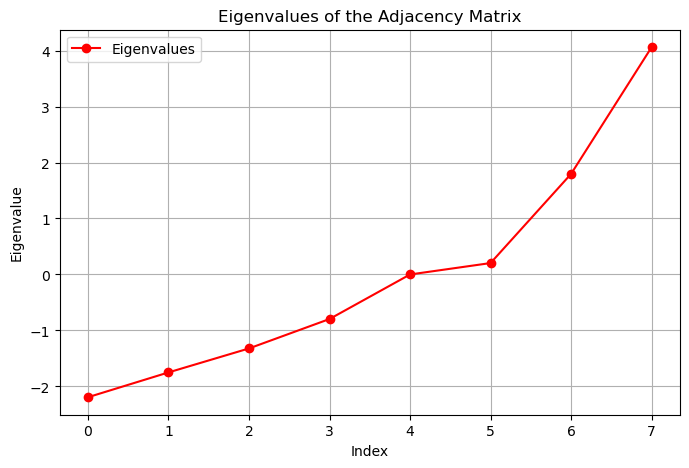

In [29]:
plt.figure(figsize=(8, 5))
plt.title("Eigenvalues of the Adjacency Matrix")
plt.xlabel("Index")
plt.ylabel("Eigenvalue")
plt.plot(sorted(eigenvalues), 'ro-', label='Eigenvalues')
plt.grid(True)
plt.legend()
plt.show()



EigenValue is: 4.060, The EigenVector is: [0.28084451 0.45322958 0.29125496 0.44834013 0.42388042 0.25610525
 0.16749562 0.39566615] 

EigenValue is: 1.796, The EigenVector is: [ 0.41591041  0.26375024  0.34187641 -0.06553266 -0.35995967 -0.50487818
 -0.48144307  0.14149193] 

EigenValue is: -2.193, The EigenVector is: [-0.43764928  0.12098599  0.39045893 -0.53958994 -0.12682873  0.35037855
 -0.10194067  0.44829394] 

EigenValue is: -1.750, The EigenVector is: [-0.14331209  0.49457463 -0.31639943  0.20237027 -0.68065182  0.07578003
  0.34568236  0.07259098] 

EigenValue is: -1.321, The EigenVector is: [-0.16346895 -0.49926567  0.29542906  0.27234644 -0.16441202 -0.41148657
  0.43581539  0.41984904] 

EigenValue is: -0.796, The EigenVector is: [ 0.41905007 -0.46218509 -0.15161891  0.16379361 -0.3437403   0.54687383
 -0.25525645  0.28032323] 

EigenValue is: 0.000, The EigenVector is: [-5.77350269e-01  7.05560570e-17 -1.25175860e-16  5.77350269e-01
  1.91769396e-16 -7.24360358e-17 -5.773

/tmp/ipykernel_78268/3850949755.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


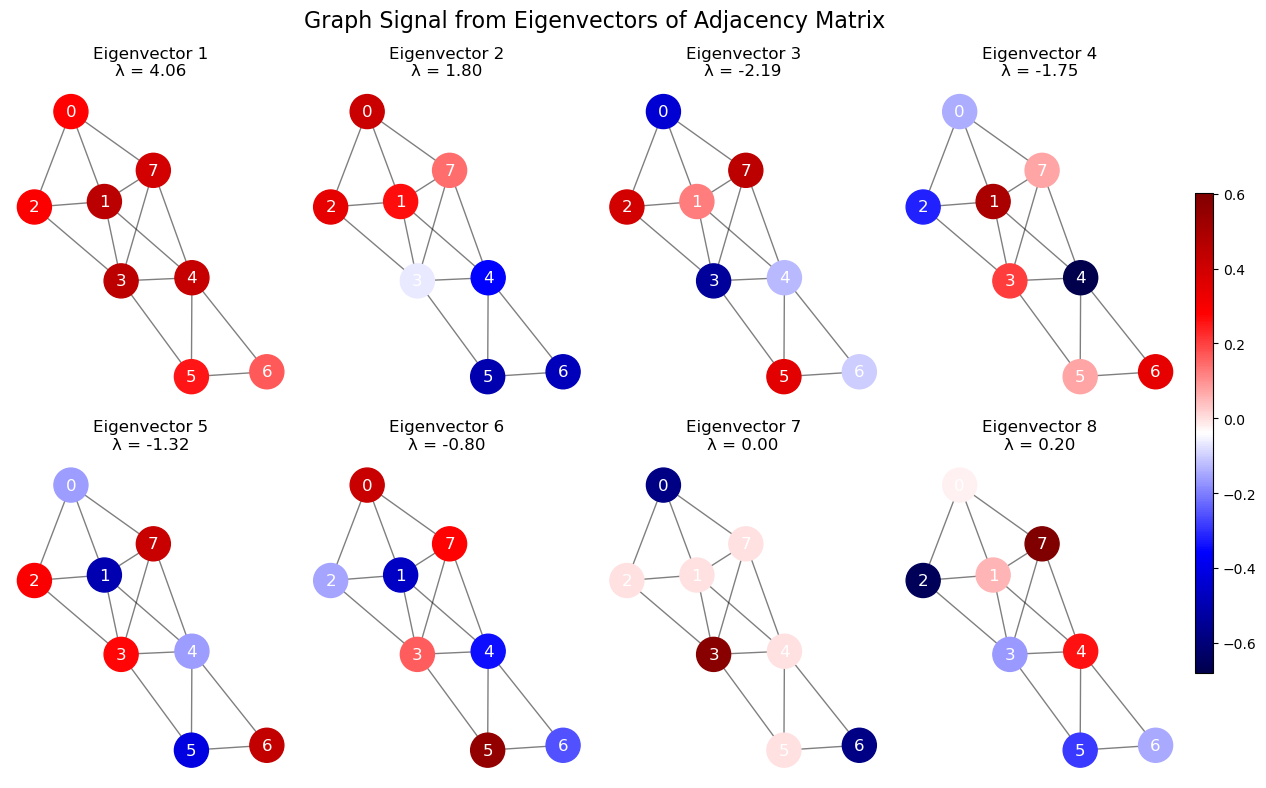

In [ ]:
pos = nx.spring_layout(G3, seed=0)

vmin = eigenvectors.real.min()
vmax = eigenvectors.real.max()

fig, axes = plt.subplots(2, 4, figsize=(12, 8))
axes = axes.flatten()
node_list = sorted(G3.nodes())

for i in range(len(eigenvalues)):
    ax = axes[i]
    signal = eigenvectors[:, i]
    
    nodes = nx.draw_networkx_nodes(G3, 
                                   pos,
                                   nodelist=node_list,
                                   node_color=signal,
                                   cmap=plt.cm.seismic,
                                   vmin=vmin,
                                   vmax=vmax,
                                   node_size=600,
                                   ax=ax)
    
    print(f"EigenValue is: {eigenvalues[i]:.3f}, The EigenVector is:", signal, '\n')

    nx.draw_networkx_edges(G3, 
                           pos, 
                           alpha=0.5, 
                           ax=ax)
    
    nx.draw_networkx_labels(G3, 
                            pos, 
                            font_color='white', 
                            ax=ax)
    
    ax.set_title(f"Eigenvector {i+1}\nλ = {eigenvalues[i]:.2f}")
    ax.axis('off')


cbar_ax = fig.add_axes([1, 0.15, 0.015, 0.6])  
fig.colorbar(nodes, cax=cbar_ax)
plt.suptitle("Graph Signal from Eigenvectors of Adjacency Matrix", fontsize=16)
plt.tight_layout()
plt.show()

### ✅ Note: Why is the Eigenvector Corresponding to the Largest Eigenvalue All Positive?

According to the **Perron–Frobenius Theorem**, if the following conditions hold:

- The **adjacency matrix \( A \)** contains only **non-negative values** (e.g., 0 or 1),  
- And the **graph is connected** (i.e., there's a path between every pair of nodes),

Then:

- The **largest eigenvalue** (also called the *Perron root*) is **positive and unique**,  
- The **corresponding eigenvector** can be chosen such that **all its components are positive**.

---

### 🔍 Observation on the Graph:

As you can see in the **visualization of Eigenvector Number 1**,  
the eigenvector corresponding to the **largest eigenvalue** (λ ≈ 4.06) has **all positive components**.  
This confirms the conditions of the Perron–Frobenius Theorem for connected graphs with non-negative adjacency matrices.
